In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
df = pd.read_csv('../datasets/cleanedfix.csv')

In [18]:
df.iloc[:,0:5]

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience
0,17:00:00,Dewasa,Male,Employee,1-2yr
1,17:00:00,Dewasa,Male,Employee,Above 10yr
2,17:00:00,Dewasa,Male,Employee,1-2yr
3,01:00:00,Dewasa,Male,Employee,5-10yr
4,01:00:00,Dewasa,Male,Employee,2-5yr
...,...,...,...,...,...
12311,16:00:00,Dewasa,Male,Employee,2-5yr
12312,18:00:00,Unknwon,Male,Employee,5-10yr
12313,13:00:00,Lansia,Male,Employee,5-10yr
12314,13:00:00,Dewasa,Female,Employee,Above 10yr


In [19]:
df.iloc[:,5:10]

,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment
0,Private Vehicle,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain
1,Public Transport,Owner,Office areas,Undivided Two way,Tangent road with flat terrain
2,Commercial Vehicle,Owner,Recreational areas,other,Tangent road with flat terrain
3,Public Transport,Governmental,Office areas,other,Tangent road with mild grade and flat terrain
4,Private Vehicle,Owner,Industrial areas,other,Tangent road with flat terrain
...,...,...,...,...,...
12311,Commercial Vehicle,Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain
12312,Private Vehicle,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments
12313,Public Transport,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and
12314,Commercial Vehicle,Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and


In [20]:
df.iloc[:,10:15]

,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions
0,No junction,Asphalt roads,Dry,Daylight,Normal
1,No junction,Asphalt roads,Dry,Daylight,Normal
2,No junction,Asphalt roads,Dry,Daylight,Normal
3,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal
4,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal
...,...,...,...,...,...
12311,No junction,Asphalt roads,Dry,Daylight,Normal
12312,No junction,Asphalt roads,Dry,Daylight,Normal
12313,No junction,Asphalt roads,Dry,Daylight,Normal
12314,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal


In [21]:
df.iloc[:,15:20]

,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity
0,Stationary Object Collision,2,2,Moving forward,na
1,Vehicle Collision,2,2,Moving forward,na
2,Stationary Object Collision,2,2,Moving forward,3
3,Vehicle Collision,2,2,Moving forward,3
4,Vehicle Collision,2,2,Moving forward,na
...,...,...,...,...,...
12311,Vehicle Collision,2,1,Moving forward,na
12312,Vehicle Collision,2,1,Other,na
12313,Vehicle Collision,1,1,Other,3
12314,Vehicle Collision,2,1,Other,na


# Kemenhub RI, Jasa Marga, PUTR, Operator Jalan

- Area occured with accident severity
- Day of week with accident severity and time
- Type of Juction with number of casualties
- LIght conditions and type of junctions
- Types of colission and type of junction and accident severity
- Road surface type with accident severity

# Aplikasi Navigasi, BMKG, gps

- Weather Conditions, time, days of week
- Time, accident severity [v]
- Road surface conditions, Accident severity
- Road surface type, weather conditions, accident severity



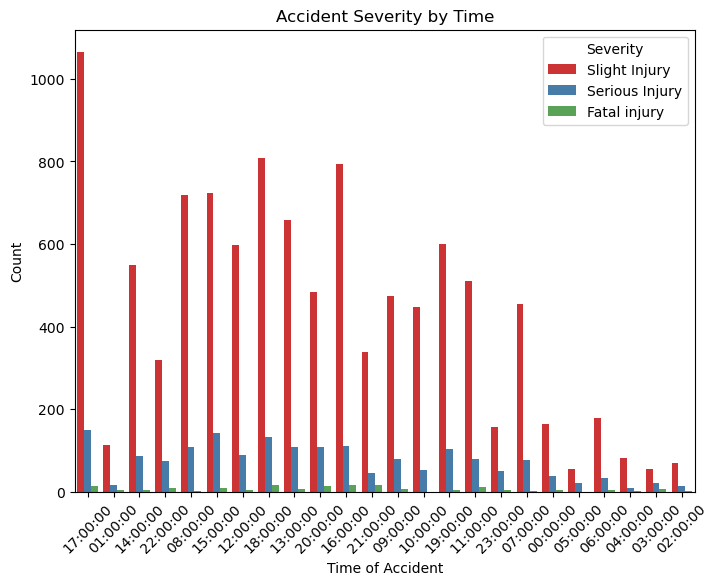

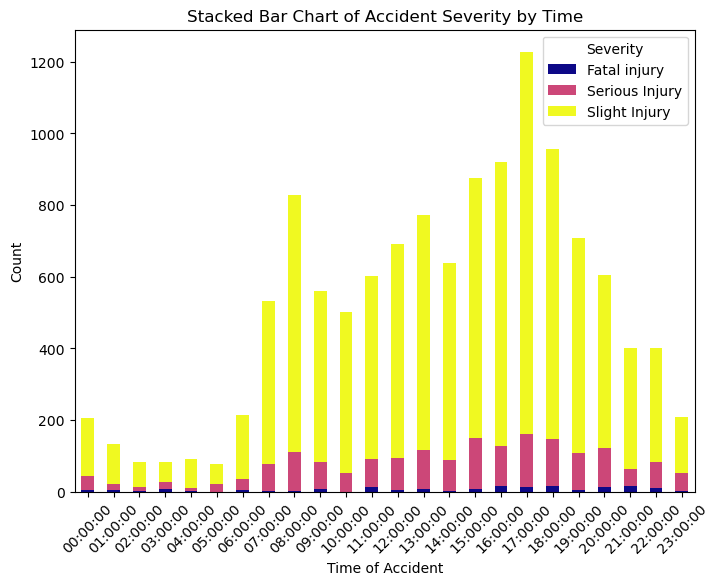

In [ ]:
# Countplot untuk melihat distribusi


# Alternatif: Stacked Bar Chart
df_counts = df.groupby(['Time', 'Accident_severity']).size().unstack()
df_counts.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8, 6))
plt.xlabel('Time of Accident')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Accident Severity by Time')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.show()


# Asuransi dan Rental Mobil

- Sex of driver accident severity
- Age of band accident severity (dataset yang belum di prerpo)
- Type of vehicle with accident severity
- Type of vehicle, owner of vehicle, accident severity

In [60]:
df['Sex_of_driver'].value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

In [61]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [74]:
# Groupby dan ubah format agar menjadi tabel pivot
pivot_df = df.groupby(['Sex_of_driver', 'Accident_severity']).size().unstack(fill_value=0)

# Tampilkan DataFrame hasil
print(pivot_df)

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Sex_of_driver                                                 
Female                        5             104            592
Male                        152            1621           9664
Unknown                       1              18            159


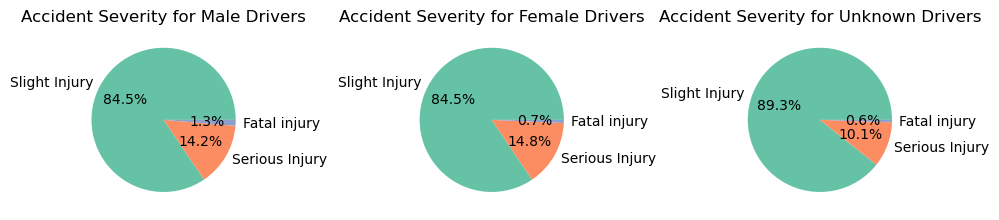

In [57]:
# Dapatkan kategori unik dari 'Sex_of_driver'
sex_categories = df['Sex_of_driver'].unique()

# Buat figure dengan jumlah subplot sesuai jumlah kategori jenis kelamin
fig, axes = plt.subplots(1, len(sex_categories), figsize=(10, 5))

# Jika hanya ada satu kategori jenis kelamin, buat list axes
if len(sex_categories) == 1:
    axes = [axes]

# Iterasi untuk setiap kategori jenis kelamin dan buat pie chart
for i, sex in enumerate(sex_categories):
    subset = df[df['Sex_of_driver'] == sex]  # Ambil data hanya untuk jenis kelamin tertentu
    severity_counts = subset['Accident_severity'].value_counts()  # Hitung jumlah kecelakaan per kategori keparahan
    
    axes[i].pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
    axes[i].set_title(f'Accident Severity for {sex} Drivers')

plt.tight_layout()
plt.show()

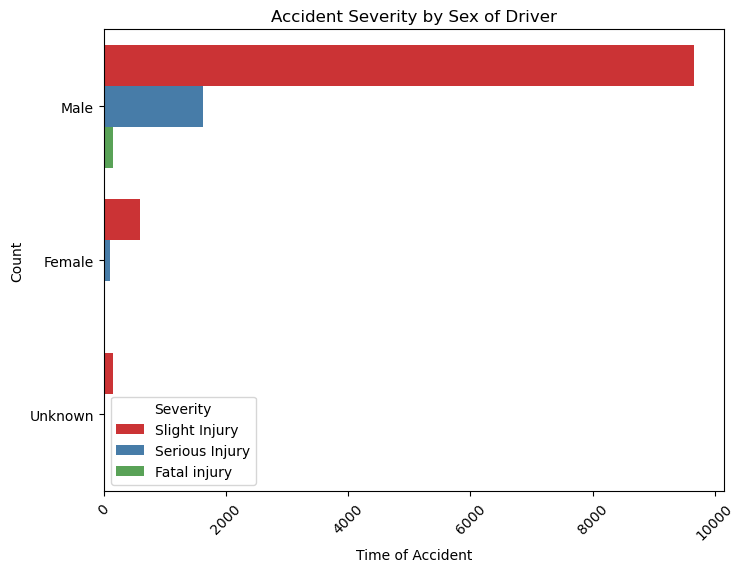

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Sex_of_driver', hue='Accident_severity', palette='Set1')
plt.xlabel('Time of Accident')  
plt.ylabel('Count')
plt.title('Accident Severity by Sex of Driver')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.show()

# Media 
- Time, wather, days of week
- Number of casualties, number of vehicle involved, accident severity